<a href="https://colab.research.google.com/github/Akash6700882/Akash6700882/blob/main/CodeAlpha_Emotion_recognistion_of_speech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyloudnorm

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving 1001_DFA_ANG_XX.wav to 1001_DFA_ANG_XX.wav
Saving 1001_DFA_DIS_XX.wav to 1001_DFA_DIS_XX.wav
Saving 1001_DFA_FEA_XX.wav to 1001_DFA_FEA_XX.wav
Saving 1001_DFA_HAP_XX.wav to 1001_DFA_HAP_XX.wav
Saving 1001_DFA_NEU_XX.wav to 1001_DFA_NEU_XX.wav
Saving 1001_DFA_SAD_XX.wav to 1001_DFA_SAD_XX.wav
Saving 1001_IEO_ANG_HI.wav to 1001_IEO_ANG_HI.wav
Saving 1001_IEO_ANG_LO.wav to 1001_IEO_ANG_LO.wav
Saving 1001_IEO_ANG_MD.wav to 1001_IEO_ANG_MD.wav
Saving 1001_IEO_DIS_HI.wav to 1001_IEO_DIS_HI.wav
Saving 1001_IEO_DIS_LO.wav to 1001_IEO_DIS_LO.wav
Saving 1001_IEO_DIS_MD.wav to 1001_IEO_DIS_MD.wav
Saving 1001_IEO_FEA_HI.wav to 1001_IEO_FEA_HI.wav
Saving 1001_IEO_FEA_LO.wav to 1001_IEO_FEA_LO.wav
Saving 1001_IEO_FEA_MD.wav to 1001_IEO_FEA_MD.wav
Saving 1001_IEO_HAP_HI.wav to 1001_IEO_HAP_HI.wav
Saving 1001_IEO_HAP_LO.wav to 1001_IEO_HAP_LO.wav
Saving 1001_IEO_HAP_MD.wav to 1001_IEO_HAP_MD.wav
Saving 1001_IEO_NEU_XX.wav to 1001_IEO_NEU_XX.wav
Saving 1001_IEO_SAD_HI.wav to 1001_IEO_SAD_HI.wav


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

# ✅ Correct path — with quotes, and full absolute path
data_path = "/content/drive/MyDrive/Audio1"

# List first 10 files in that folder
if os.path.exists(data_path):
    print("Folder found! Listing files:\n")
    print(os.listdir(data_path)[:10])
else:
    print("Folder not found! Check the folder name or path.")


Folder found! Listing files:

['1001_IEO_NEU_XX.wav', '1001_IEO_SAD_HI.wav', '1001_IEO_HAP_HI.wav', '1001_IEO_FEA_MD.wav', '1001_IEO_HAP_LO.wav', '1001_IEO_DIS_MD.wav', '1001_IEO_FEA_LO.wav', '1001_IEO_HAP_MD.wav', '1001_IEO_FEA_HI.wav', '1001_IEO_DIS_LO.wav']


In [ ]:
# List first 10 .wav files
audio_files = [f for f in os.listdir(data_path) if f.endswith(".wav")]

print("Total .wav files:", len(audio_files))
print("Sample filenames:")
for f in audio_files[:10]:
    print(f)


Total .wav files: 550
Sample filenames:
1001_IEO_NEU_XX.wav
1001_IEO_SAD_HI.wav
1001_IEO_HAP_HI.wav
1001_IEO_FEA_MD.wav
1001_IEO_HAP_LO.wav
1001_IEO_DIS_MD.wav
1001_IEO_FEA_LO.wav
1001_IEO_HAP_MD.wav
1001_IEO_FEA_HI.wav
1001_IEO_DIS_LO.wav


In [ ]:
import os
import math
import json
import time
import librosa
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import pyloudnorm as pyln
import IPython.display as ipd
import matplotlib.pyplot as plt
from joblib import delayed, Parallel

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

import torchaudio
import torchaudio.transforms as T

In [ ]:
emotion_map = {
    "ANG": "Angry",
    "DIS": "Disgust",
    "FEA": "Fearful",
    "HAP": "Happy",
    "NEU": "Neutral",
    "SAD": "Sad",
    "SUR": "Surprised"
}


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Replace all Kaggle paths with your own Google Drive folder paths

# Assuming you've created a folder structure like:
# /MyDrive/EmotionSpeech/CREMA-D/
# /MyDrive/EmotionSpeech/RAVDESS/
# /MyDrive/EmotionSpeech/SAVEE/
# /MyDrive/EmotionSpeech/TESS/
# /MyDrive/EmotionSpeech/MLEND/
# /MyDrive/EmotionSpeech/IEMOCAP/

CREMAD = "/content/drive/MyDrive/EmotionSpeech/CREMA-D"      # Your 550 audio files from CREMA-D
RAVDESS = "/content/drive/MyDrive/EmotionSpeech/RAVDESS"     # If uploaded RAVDESS set
SAVEE   = "/content/drive/MyDrive/EmotionSpeech/SAVEE"       # If uploaded SAVEE set
TESS    = "/content/drive/MyDrive/EmotionSpeech/TESS"        # TESS set
MLEND   = "/content/drive/MyDrive/EmotionSpeech/MLEND"       # MLEND numerals dataset
IEMOCAP = "/content/drive/MyDrive/EmotionSpeech/IEMOCAP"     # Full IEMOCAP

# You can print these to verify
print("CREMA-D Path:", CREMAD)
print("RAVDESS Path:", RAVDESS)


CREMA-D Path: /content/drive/MyDrive/EmotionSpeech/CREMA-D
RAVDESS Path: /content/drive/MyDrive/EmotionSpeech/RAVDESS


In [ ]:
audios = pd.DataFrame(data=[], columns=['Dataset', 'Path', "File", "Emotion"])
audios

,Dataset,Path,File,Emotion


In [ ]:
# ⏱️ Optional: measure execution time
import time
start = time.time()

import os
import pandas as pd
from joblib import Parallel, delayed

# ✅ Your mounted CREMA-D path on Google Drive
CREMAD = "/content/drive/MyDrive/Audio1/"

# ✅ Define emotion map from filename codes
emotion_map = {
    "DIS": "Disgust",
    "SAD": "Sad",
    "HAP": "Happy",
    "NEU": "Neutral",
    "FEA": "Fearful",
    "ANG": "Angry"
}

# ✅ Function to extract metadata from filename
def process_file(file):
    if file.endswith(".wav"):
        emotion_code = file.split("_")[2]
        if emotion_code in emotion_map:
            return {
                "Dataset": "CREMA-D",
                "Path": os.path.join(CREMAD, file),
                "File": os.path.splitext(file)[0],
                "Emotion": emotion_map[emotion_code]
            }

# ✅ Parallel processing of all .wav files
files = Parallel(n_jobs=-1, verbose=5)(
    delayed(process_file)(file) for file in os.listdir(CREMAD)
)

# ✅ Remove None entries (in case of unsupported files)
files = [f for f in files if f is not None]

# ✅ Create DataFrame
audios = pd.DataFrame(files)

# ✅ Display few rows
print("Total .wav files parsed:", len(audios))
print(audios.head())

end = time.time()
print(f"✅ Done in {end - start:.2f} seconds")


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Total .wav files parsed: 550
   Dataset                                               Path  \
0  CREMA-D  /content/drive/MyDrive/Audio1/1001_IEO_NEU_XX.wav   
1  CREMA-D  /content/drive/MyDrive/Audio1/1001_IEO_SAD_HI.wav   
2  CREMA-D  /content/drive/MyDrive/Audio1/1001_IEO_HAP_HI.wav   
3  CREMA-D  /content/drive/MyDrive/Audio1/1001_IEO_FEA_MD.wav   
4  CREMA-D  /content/drive/MyDrive/Audio1/1001_IEO_HAP_LO.wav   

              File  Emotion  
0  1001_IEO_NEU_XX  Neutral  
1  1001_IEO_SAD_HI      Sad  
2  1001_IEO_HAP_HI    Happy  
3  1001_IEO_FEA_MD  Fearful  
4  1001_IEO_HAP_LO    Happy  
✅ Done in 0.56 seconds


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 550 out of 550 | elapsed:    0.5s finished


In [ ]:
import os
import pandas as pd
import time

start = time.time()

# ✅ Your single folder path
AUDIO_FOLDER = "/content/drive/MyDrive/Audio1/"

# ✅ RAVDESS emotion map
emotion_map = {
    1: "Neutral",
    2: "Calm",
    3: "Happy",
    4: "Sad",
    5: "Angry",
    6: "Fearful",
    7: "Disgust",
    8: "Surprised"
}

# ✅ Process RAVDESS-style files from AUDIO_FOLDER
ravdess_records = []
for file in os.listdir(AUDIO_FOLDER):
    if file.endswith(".wav") and file.count('-') >= 6:
        try:
            emotion_id = int(file.split("-")[2])
            if emotion_id in emotion_map:
                ravdess_records.append({
                    "Dataset": "RAVDESS",
                    "Path": os.path.join(AUDIO_FOLDER, file),
                    "File": os.path.splitext(file)[0],
                    "Emotion": emotion_map[emotion_id]
                })
        except:
            continue

# ✅ Add to existing audios DataFrame (if already created)
audios = pd.concat([audios, pd.DataFrame(ravdess_records)], ignore_index=True)

print("✅ RAVDESS files added from Audio1 folder:", len(ravdess_records))
print("🔢 Total files in audios DataFrame:", len(audios))
print(audios.tail())

end = time.time()
print(f"⏱️ Done in {end - start:.2f} seconds")


✅ RAVDESS files added from Audio1 folder: 0
🔢 Total files in audios DataFrame: 550
     Dataset                                               Path  \
545  CREMA-D  /content/drive/MyDrive/Audio1/1007_IWL_NEU_XX.wav   
546  CREMA-D  /content/drive/MyDrive/Audio1/1007_IWL_FEA_XX.wav   
547  CREMA-D  /content/drive/MyDrive/Audio1/1007_IWL_SAD_XX.wav   
548  CREMA-D  /content/drive/MyDrive/Audio1/1007_IWL_ANG_XX.wav   
549  CREMA-D  /content/drive/MyDrive/Audio1/1007_IWW_DIS_XX.wav   

                File  Emotion  
545  1007_IWL_NEU_XX  Neutral  
546  1007_IWL_FEA_XX  Fearful  
547  1007_IWL_SAD_XX      Sad  
548  1007_IWL_ANG_XX    Angry  
549  1007_IWW_DIS_XX  Disgust  
⏱️ Done in 0.01 seconds


In [ ]:
# ✅ Dataset paths
CREMAD = "/content/drive/MyDrive/Audio1/"  # Currently only this one has files

# (Update these if/when you upload other datasets)
RAVDESS = "/content/drive/MyDrive/EmotionSpeech/RAVDESS/"
SAVEE = "/content/drive/MyDrive/EmotionSpeech/SAVEE/"
TESS = "/content/drive/MyDrive/EmotionSpeech/TESS/"
IEMOCAP = "/content/drive/MyDrive/EmotionSpeech/IEMOCAP/"
MLEND = "/content/drive/MyDrive/EmotionSpeech/MLEND/"

# ✅ Master dataframe
audios = pd.DataFrame(columns=["Dataset", "Path", "File", "Emotion"])

# ✅ CREMA-D
def extract_cremad():
    emotion_map = {
        "DIS": "Disgust", "SAD": "Sad", "HAP": "Happy",
        "NEU": "Neutral", "FEA": "Fearful", "ANG": "Angry"
    }
    def process_file(file):
        if file.endswith(".wav"):
            parts = file.split("_")
            if len(parts) >= 3 and parts[2] in emotion_map:
                return {
                    "Dataset": "CREMA-D",
                    "Path": os.path.join(CREMAD, file),
                    "File": os.path.splitext(file)[0],
                    "Emotion": emotion_map[parts[2]]
                }
    files = Parallel(n_jobs=-1, verbose=0)(
        delayed(process_file)(file) for file in os.listdir(CREMAD)
    )
    return [f for f in files if f is not None]

# ✅ RAVDESS
def extract_ravdess():
    emotion_map = {
        1: "Neutral", 2: "Calm", 3: "Happy", 4: "Sad",
        5: "Angry", 6: "Fearful", 7: "Disgust", 8: "Surprised"
    }
    records = []
    if not os.path.exists(RAVDESS):
        return []
    for folder in os.listdir(RAVDESS):
        folder_path = os.path.join(RAVDESS, folder)
        if os.path.isdir(folder_path):
            for file in os.listdir(folder_path):
                if file.endswith(".wav"):
                    try:
                        emotion_id = int(file.split("-")[2])
                        emotion = emotion_map.get(emotion_id)
                        if emotion:
                            records.append({
                                "Dataset": "RAVDESS",
                                "Path": os.path.join(folder_path, file),
                                "File": os.path.splitext(file)[0],
                                "Emotion": emotion
                            })
                    except:
                        continue
    return records

# ✅ Add more extraction functions for TESS, SAVEE, etc., later

# ⏱️ Run everything
start = time.time()

# Add datasets that actually exist
audios = pd.DataFrame(extract_cremad())
audios = pd.concat([audios, pd.DataFrame(extract_ravdess())], ignore_index=True)

print("📊 Dataset stats:")
print(audios["Dataset"].value_counts())
print()
print("📁 Sample files:")
print(audios.head())

end = time.time()
print(f"✅ Done in {end - start:.2f} seconds")


📊 Dataset stats:
Dataset
CREMA-D    550
Name: count, dtype: int64

📁 Sample files:
   Dataset                                               Path  \
0  CREMA-D  /content/drive/MyDrive/Audio1/1001_IEO_NEU_XX.wav   
1  CREMA-D  /content/drive/MyDrive/Audio1/1001_IEO_SAD_HI.wav   
2  CREMA-D  /content/drive/MyDrive/Audio1/1001_IEO_HAP_HI.wav   
3  CREMA-D  /content/drive/MyDrive/Audio1/1001_IEO_FEA_MD.wav   
4  CREMA-D  /content/drive/MyDrive/Audio1/1001_IEO_HAP_LO.wav   

              File  Emotion  
0  1001_IEO_NEU_XX  Neutral  
1  1001_IEO_SAD_HI      Sad  
2  1001_IEO_HAP_HI    Happy  
3  1001_IEO_FEA_MD  Fearful  
4  1001_IEO_HAP_LO    Happy  
✅ Done in 0.54 seconds


In [ ]:
import os
import pandas as pd
from joblib import Parallel, delayed
import time

# Start timing
start = time.time()

# ✅ Folder where your audio files are stored
AUDIO_FOLDER = "/content/drive/MyDrive/Audio1/"

# ✅ Emotion maps
cremad_map = {"DIS": "Disgust", "SAD": "Sad", "HAP": "Happy",
              "NEU": "Neutral", "FEA": "Fearful", "ANG": "Angry"}
ravdess_map = {
    "01": "Neutral", "02": "Calm", "03": "Happy", "04": "Sad",
    "05": "Angry", "06": "Fearful", "07": "Disgust", "08": "Surprised"
}
savee_map = {"a": "Angry", "d": "Disgust", "f": "Fearful",
             "h": "Happy", "n": "Neutral", "sa": "Sad", "su": "Surprised"}

# ✅ Function to identify and parse emotion from each file
def identify_and_process(file):
    if not file.endswith(".wav"):
        return None

    parts = file.split("_")
    if len(parts) == 4 and parts[2] in cremad_map:
        # CREMA-D format
        return {
            "Dataset": "CREMA-D",
            "Path": os.path.join(AUDIO_FOLDER, file),
            "File": os.path.splitext(file)[0],
            "Emotion": cremad_map[parts[2]]
        }
    elif "-" in file:
        # Possibly RAVDESS format
        try:
            emotion_id = file.split("-")[2]
            emotion = ravdess_map[emotion_id]
            return {
                "Dataset": "RAVDESS",
                "Path": os.path.join(AUDIO_FOLDER, file),
                "File": os.path.splitext(file)[0],
                "Emotion": emotion
            }
        except:
            return None
    elif file.startswith("a") and file.endswith(".wav"):
        # Possibly SAVEE format
        emotion_key = ''.join([c for c in os.path.splitext(file)[0] if not c.isdigit()])
        if emotion_key in savee_map:
            return {
                "Dataset": "SAVEE",
                "Path": os.path.join(AUDIO_FOLDER, file),
                "File": os.path.splitext(file)[0],
                "Emotion": savee_map[emotion_key]
            }
    # Add more parsers here if needed
    return None  # Unrecognized format

# ✅ Process all files in parallel
files = Parallel(n_jobs=-1, verbose=5)(
    delayed(identify_and_process)(file) for file in os.listdir(AUDIO_FOLDER)
)

# ✅ Clean and build DataFrame
files = [f for f in files if f is not None]
audios = pd.DataFrame(files)

# ✅ Print results
print("📊 Dataset stats:\n", audios["Dataset"].value_counts())
print("\n📁 Sample files:")
print(audios.head())

# ✅ Timing
end = time.time()
print(f"✅ Done in {end - start:.2f} seconds")


📊 Dataset stats:
 Dataset
CREMA-D    550
Name: count, dtype: int64

📁 Sample files:
   Dataset                                               Path  \
0  CREMA-D  /content/drive/MyDrive/Audio1/1001_IEO_NEU_XX.wav   
1  CREMA-D  /content/drive/MyDrive/Audio1/1001_IEO_SAD_HI.wav   
2  CREMA-D  /content/drive/MyDrive/Audio1/1001_IEO_HAP_HI.wav   
3  CREMA-D  /content/drive/MyDrive/Audio1/1001_IEO_FEA_MD.wav   
4  CREMA-D  /content/drive/MyDrive/Audio1/1001_IEO_HAP_LO.wav   

              File  Emotion  
0  1001_IEO_NEU_XX  Neutral  
1  1001_IEO_SAD_HI      Sad  
2  1001_IEO_HAP_HI    Happy  
3  1001_IEO_FEA_MD  Fearful  
4  1001_IEO_HAP_LO    Happy  
✅ Done in 0.11 seconds


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 550 out of 550 | elapsed:    0.1s finished


In [ ]:
import IPython.display as ipd

sample_path = audios.iloc[0]["Path"]
ipd.Audio(sample_path)


In [ ]:
import librosa

def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=16000)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
    return mfcc.T  # transpose to (time, features)

# Example for one file
mfcc_sample = extract_features(audios.iloc[0]["Path"])
print("MFCC shape:", mfcc_sample.shape)


MFCC shape: (51, 40)


In [ ]:
audios

,Dataset,Path,File,Emotion
0,CREMA-D,/content/drive/MyDrive/Audio1/1001_IEO_NEU_XX.wav,1001_IEO_NEU_XX,Neutral
1,CREMA-D,/content/drive/MyDrive/Audio1/1001_IEO_SAD_HI.wav,1001_IEO_SAD_HI,Sad
2,CREMA-D,/content/drive/MyDrive/Audio1/1001_IEO_HAP_HI.wav,1001_IEO_HAP_HI,Happy
3,CREMA-D,/content/drive/MyDrive/Audio1/1001_IEO_FEA_MD.wav,1001_IEO_FEA_MD,Fearful
4,CREMA-D,/content/drive/MyDrive/Audio1/1001_IEO_HAP_LO.wav,1001_IEO_HAP_LO,Happy
...,...,...,...,...
545,CREMA-D,/content/drive/MyDrive/Audio1/1007_IWL_NEU_XX.wav,1007_IWL_NEU_XX,Neutral
546,CREMA-D,/content/drive/MyDrive/Audio1/1007_IWL_FEA_XX.wav,1007_IWL_FEA_XX,Fearful
547,CREMA-D,/content/drive/MyDrive/Audio1/1007_IWL_SAD_XX.wav,1007_IWL_SAD_XX,Sad
548,CREMA-D,/content/drive/MyDrive/Audio1/1007_IWL_ANG_XX.wav,1007_IWL_ANG_XX,Angry


(array(['CREMA-D'], dtype=object), <Axes: ylabel='count'>)

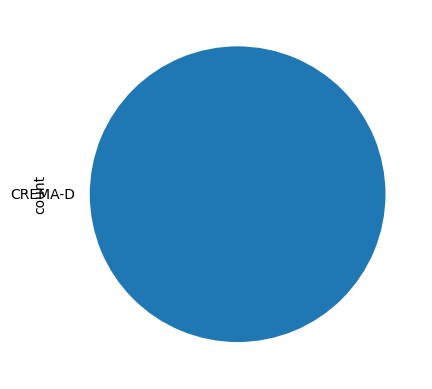

In [ ]:
audios.Dataset.unique(), audios.Dataset.value_counts().plot.pie()

(array(['Neutral', 'Sad', 'Happy', 'Fearful', 'Disgust', 'Angry'],
       dtype=object),
 <Axes: xlabel='Emotion'>)

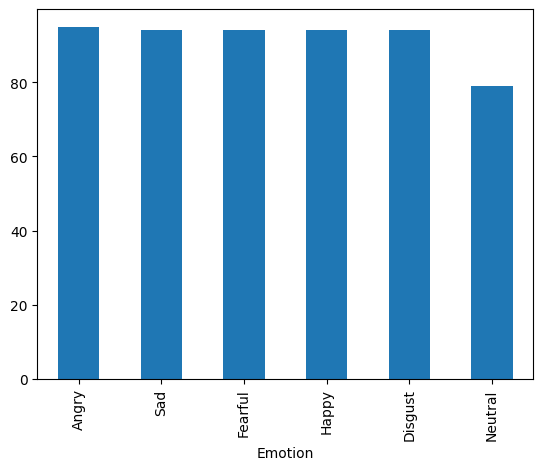

In [ ]:
# Emotion distribution
audios.Emotion.unique(), audios.Emotion.value_counts().plot.bar()

In [ ]:
SAMPLE_RATE = 16000
meter = pyln.Meter(SAMPLE_RATE)

def estimate_snr(y):
    signal_power = np.mean(y**2)
    noise_power = np.var(y - np.mean(y))
    return 10 * np.log10(signal_power / (noise_power + 1e-12))

def process_file(idx, row, meter):
    audio_path = row['Path']
    try:
        y, sr_actual = librosa.load(audio_path)
        duration = librosa.get_duration(y=y, sr=sr_actual)
        loudness = meter.integrated_loudness(y)
        signal_to_noise = estimate_snr(y)
        silence_pct = np.sum(np.abs(y) < 0.001) / len(y)

        return {
            "ID": idx,
            'path': audio_path,
            "dataset": row['Dataset'],
            'duration': duration,
            'sample_rate': sr_actual,
            'loudness': loudness,
            'rms': np.sqrt(np.mean(y**2)),
            'peak': np.max(np.abs(y)),
            "signal_to_noise": signal_to_noise,
            "silence_pct": silence_pct,
            'emotion': row['Emotion']
        }
    except Exception as e:
        print(f"⚠️ Error processing {audio_path}: {e}")
        return idx


def get_info(df, sample_size=5, sr=SAMPLE_RATE, meter=meter, sup_dir="/kaggle/working"):
    """
    Verify audio files exist and can be used and check their properties
    """
    print("🔍 Verifying audio files...")

    # Check all files with progress bar
    results = Parallel(n_jobs=-1)(
        delayed(process_file)(idx, row, meter) for idx, row in tqdm(df.iterrows(), total=len(df), desc="Checking audio files")
    )

    audio_info = [r for r in results if type(r) == dict]
    invalid_files = [r for r in results if type(r) != dict]

    print(f"✅ Valid files: {len(audio_info)}")
    print(f"❌ Invalid files: {len(invalid_files)}")

    if len(audio_info) == 0:
        print("⚠️  No valid audio files found.")
        return

    # Plot sample rate distribution
    if len(audio_info) > 1:
        sr_df = pd.DataFrame(audio_info)
        print(f"Length of DataFrame: {len(sr_df)}")

        plt.figure(figsize=(10, 10))

        # Sample Rate Distribution
        plt.subplot(3, 3, 1)
        sr_df['sample_rate'].hist(bins=20, alpha=0.7, color='lightcoral')
        plt.title('Sample Rate Distribution')
        plt.xlabel('Sample Rate (Hz)')
        plt.ylabel('Count')

        # Duration Distribution
        plt.subplot(3, 3, 2)
        sr_df['duration'].hist(bins=20, alpha=0.7, color='lightgreen')
        plt.title('Audio Duration Distribution')
        plt.xlabel('Duration (seconds)')
        plt.ylabel('Count')

        try:
            # pyln Loudness Distribution
            plt.subplot(3, 3, 3)
            sr_df['loudness'].hist(bins=20, alpha=0.7, color='red')
            plt.title('LUFS Loudness Distribution')
            plt.xlabel('Loudness (dB)')
            plt.ylabel('Count')
        except Exception as e:
            print("Exception occured while displaying the loudness Distribution chart:", str(e))

        # RMS Value Distribution
        plt.subplot(3, 3, 4)
        sr_df['rms'].hist(bins=20, alpha=0.7, color='lightpink')
        plt.title('RMS Perceptual Energy Distribution')
        plt.xlabel('Energy Value')
        plt.ylabel('Count')

        # Peak Value Distribution
        plt.subplot(3, 3, 5)
        sr_df['peak'].hist(bins=20, alpha=0.7, color='darkgreen')
        plt.title('Peak Distribution')
        plt.xlabel('Energy Value')
        plt.ylabel('Count')

        # Silence Distribution
        plt.subplot(3, 3, 6)
        sr_df['silence_pct'].hist(bins=20, alpha=0.7, color='purple')
        plt.title('Silence Distribution')
        plt.xlabel('Silence %')
        plt.ylabel('Count')

        # Signal-to-Noise Distribution
        try:
            plt.subplot(3, 3, 7)
            sr_df['signal_to_noise'].hist(bins=20, alpha=0.7, color='yellow')
            plt.title('Signal-to-Noise Distribution')
            plt.xlabel('Ratio')
            plt.ylabel('Count')
        except Exception as e:
            print("Exception occured while displaying the Signal-to-Noise Distribution chart:", str(e))


        plt.tight_layout()
        plt.show()

    return sr_df, invalid_files

🔍 Verifying audio files...


Checking audio files: 100%|██████████| 550/550 [01:47<00:00,  5.11it/s]


✅ Valid files: 550
❌ Invalid files: 0
Length of DataFrame: 550


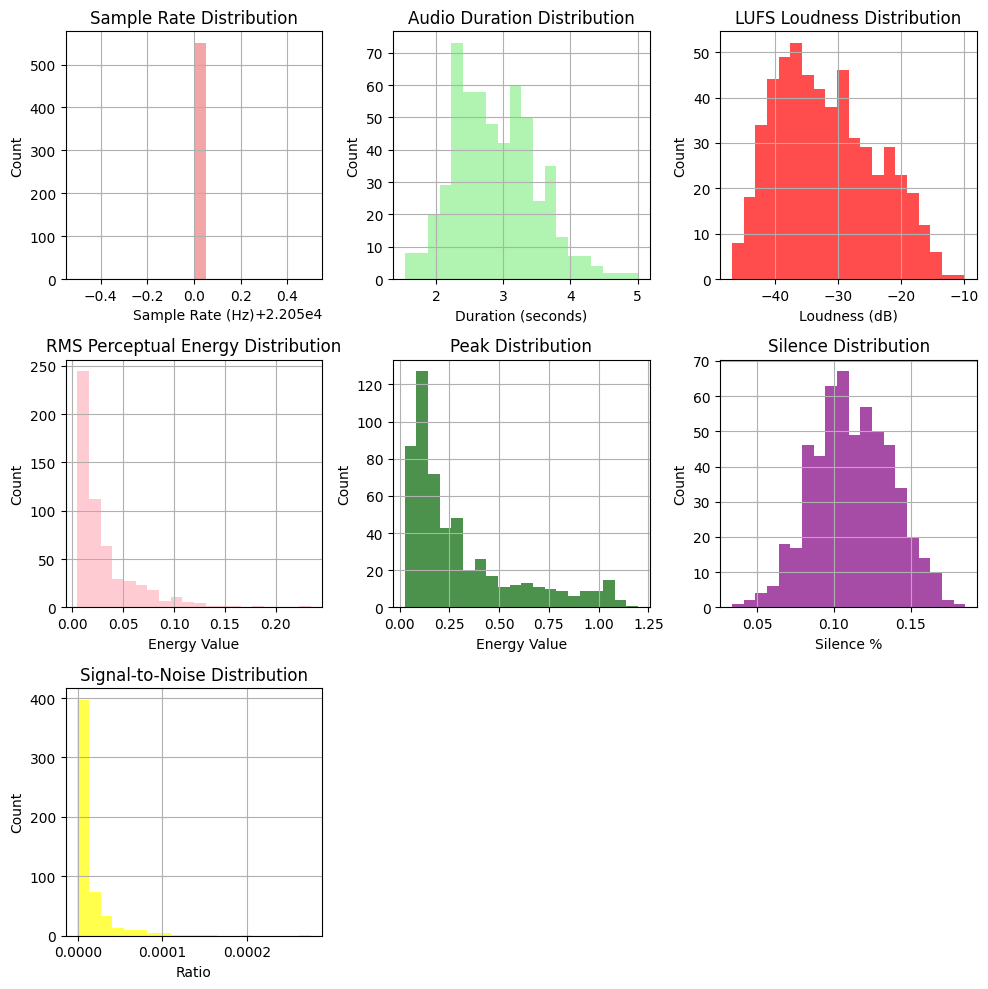

In [ ]:
# Verify audio files
sr_df, invalid_files = get_info(audios)

In [ ]:
# Getting the duration stats by the Dataset
ds_df = sr_df.copy().groupby('dataset')
ds_df["duration"].describe()

,count,mean,std,min,25%,50%,75%,max
dataset,,,,,,,,
CREMA-D,550.0,2.885368,0.610542,1.534875,2.410748,2.83619,3.269977,5.005034


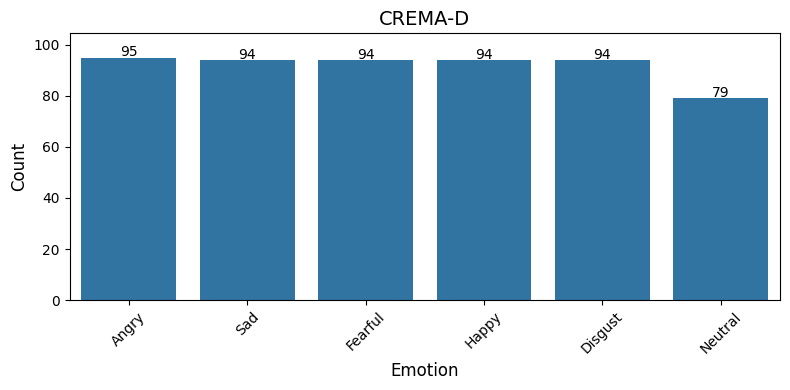

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure you use the correct dataframe name (audios or sr_df)
df = sr_df  # or df = audios

# Number of unique datasets
num_datasets = len(df['dataset'].unique())

# Create subplots with 1 row per dataset
fig, axes = plt.subplots(nrows=num_datasets, ncols=1, figsize=(8, num_datasets * 4))

# Handle if there's only one dataset (axes is not iterable)
if num_datasets == 1:
    axes = [axes]

# Loop through each dataset and plot emotion counts
for ax, dataset in zip(axes, df['dataset'].unique()):
    subset = df[df['dataset'] == dataset]
    sns.countplot(data=subset, x='emotion', ax=ax, order=subset['emotion'].value_counts().index)
    ax.set_title(f"{dataset}", fontsize=14)
    ax.set_xlabel("Emotion", fontsize=12)
    ax.set_ylabel("Count", fontsize=12)
    ax.tick_params(axis='x', rotation=45)
    ax.set_ylim(0, subset['emotion'].value_counts().max() * 1.1)

    # Add count annotations on bars
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2., height + 0.5, int(height), ha="center", fontsize=10)

plt.tight_layout()
plt.show()


In [ ]:
# Get the overall stats of all the features by the datasets
ds_df[['duration', 'loudness', 'rms', 'silence_pct', 'signal_to_noise']].describe(percentiles=[]).T

dataset                     CREMA-D
duration        count  5.500000e+02
                mean   2.885368e+00
                std    6.105423e-01
                min    1.534875e+00
                50%    2.836190e+00
                max    5.005034e+00
loudness        count  5.500000e+02
                mean  -3.179849e+01
                std    7.837606e+00
                min   -4.679049e+01
                50%   -3.268714e+01
                max   -9.785365e+00
rms             count  5.500000e+02
                mean   3.102446e-02
                std    2.955790e-02
                min    5.043411e-03
                50%    1.858319e-02
                max    2.341129e-01
silence_pct     count  5.500000e+02
                mean   1.119436e-01
                std    2.554507e-02
                min    3.349527e-02
                50%    1.104037e-01
                max    1.855659e-01
signal_to_noise count  5.500000e+02
                mean   1.357921e-05
                std    2.555690e-05
                min   -7.765792e-07
                50%    3.624034e-06
                max    2.754180e-04

In [ ]:
# Parameters
TARGET_SR = 22050
TARGET_RMS = 0.03
MAX_PEAK = 0.99
DURATION = 5.0
NUM_SAMPLES = int(TARGET_SR * DURATION)
MIN_SAMPLES = NUM_SAMPLES // (DURATION / 2)     # Min samples of 2 seconds
OUTPUT_DIR = "/kaggle/working"

# Initialize output directory
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Function to normalize the RMS energy of a wave using torch
def safe_normalize_rms(wave: torch.Tensor):
    rms = torch.sqrt(torch.mean(wave ** 2))               # Current RMS
    gain = TARGET_RMS / (rms + 1e-8)                # Compute Gain
    norm_wave = wave * gain                         # Apply Gain

    peak = torch.max(torch.abs(norm_wave))

    # If the peak has exceeded the max peak, scale it again
    if peak > MAX_PEAK:
        scale = MAX_PEAK / (peak + 1e-8)
        norm_wave *= scale

    return norm_wave

# Worker function for each file
def process_row(idx, row):
    path = row['Path']
    dataset = row["Dataset"]
    emotion = row['Emotion']
    filename = row['File']
    local_results = []

    # try:
    wave, sr = torchaudio.load(path)

    # Normalize Sample Rate
    if sr != TARGET_SR:
        resampler = torchaudio.transforms.Resample(orig_freq=sr, new_freq=TARGET_SR)
        wave = resampler(wave)

    # Convert to mono channel
    if wave.shape[0] > 1:
        wave = torch.mean(wave, dim=0, keepdim=True)

    # Normalize RMS Energy (as a substitute of normalizing Loudness)
    wave = safe_normalize_rms(wave)

    # Chunk and save the files
    total_samples = wave.shape[1]
    num_chunks = (total_samples + NUM_SAMPLES - 1) // NUM_SAMPLES

    for chunk_idx in range(num_chunks):
        start = chunk_idx * NUM_SAMPLES
        end = start + NUM_SAMPLES
        chunk = wave[:, start:end]

        actual_len = chunk.shape[1]
        if actual_len < MIN_SAMPLES and chunk_idx != 0:
            continue

        if actual_len < NUM_SAMPLES:
            # Center padding
            # padding = NUM_SAMPLES - actual_len
            # left_pad = padding // 2
            # right_pad = padding - left_pad
            # chunk = torch.nn.functional.pad(chunk, (left_pad, right_pad))

            # Left padding
            padding = NUM_SAMPLES - actual_len
            chunk = F.pad(chunk, (0, padding))

        chunk_suffix = f"_{chunk_idx}" if chunk_idx > 0 else ""
        output_filename = f"{filename}{chunk_suffix}.pt"
        save_dir = os.path.join(OUTPUT_DIR, dataset, emotion)
        os.makedirs(save_dir, exist_ok=True)

        full_output_path = os.path.join(save_dir, output_filename)
        torch.save(chunk, full_output_path)

        local_results.append({
            # 'Path': full_output_path,
            'Dataset': dataset,
            'Emotion': emotion,
            'File': filename + chunk_suffix
        })

    # except Exception as e:
    #     print(f"Error processing {path}: {e}")

    return local_results

# Parallel processing
results = Parallel(n_jobs=-1, verbose=5)(
    delayed(process_row)(idx, row) for idx, row in audios.iterrows()
)

# Flatten results and convert to DataFrame
flattened = [item for sublist in results for item in sublist]
saved_files = pd.DataFrame(flattened)

print(f"Preprocessing complete! Total chunks: {len(saved_files)}")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 180 tasks      | elapsed:   14.0s


Preprocessing complete! Total chunks: 550


[Parallel(n_jobs=-1)]: Done 540 tasks      | elapsed:   21.6s
[Parallel(n_jobs=-1)]: Done 550 out of 550 | elapsed:   21.8s finished


In [ ]:
saved_files.to_csv("saved_files.csv", index=False, columns=['Dataset', "Emotion", "File"])
saved_files

,Dataset,Emotion,File
0,CREMA-D,Neutral,1001_IEO_NEU_XX
1,CREMA-D,Sad,1001_IEO_SAD_HI
2,CREMA-D,Happy,1001_IEO_HAP_HI
3,CREMA-D,Fearful,1001_IEO_FEA_MD
4,CREMA-D,Happy,1001_IEO_HAP_LO
...,...,...,...
545,CREMA-D,Neutral,1007_IWL_NEU_XX
546,CREMA-D,Fearful,1007_IWL_FEA_XX
547,CREMA-D,Sad,1007_IWL_SAD_XX
548,CREMA-D,Angry,1007_IWL_ANG_XX


In [ ]:
# Reload the dataste from the CSV file and refilter it
audios = pd.read_csv('saved_files.csv')

In [ ]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(audios, test_size=0.2, stratify=audios.Emotion)
train_df, val_df = train_test_split(train_df, test_size=0.2, stratify=train_df.Emotion)

train_df.reset_index(drop=True, inplace=True)
val_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train_df.Emotion)

emotes2idxs = {label:idx for idx, label in enumerate(le.classes_)}

emotes2idxs, np.unique(train_df.Emotion)

({'Angry': 0, 'Disgust': 1, 'Fearful': 2, 'Happy': 3, 'Neutral': 4, 'Sad': 5},
 array(['Angry', 'Disgust', 'Fearful', 'Happy', 'Neutral', 'Sad'],
       dtype=object))

In [ ]:
class PreprocessedAudioDataset(Dataset):
    def __init__(self, df, label_encoder, super_dir='/kaggle/working/', transform=None):
        self.df = df
        self.encoder = label_encoder
        self.main_dir = super_dir
        self.transform = transform or T.MelSpectrogram(
            sample_rate=16000, n_fft=1024, hop_length=512, n_mels=64
        )

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        dataset = self.df.iloc[idx]['Dataset']
        emote = self.df.iloc[idx]["Emotion"]
        filename = self.df.iloc[idx]['File']

        tensor_path = os.path.join(self.main_dir, dataset, emote, f"{filename}.pt")
        wave = torch.load(tensor_path)
        wave = (wave - wave.mean()) / wave.std()      # Standardizing the wave

        mel = self.transform(wave)
        mel = torch.log1p(mel)
        mel = mel.squeeze(0).transpose(0, 1)
        mel = (mel - mel.mean()) / mel.std()         # Standardizing the MelSpectrogram

        label = self.encoder.transform([emote])[0]

        return filename, mel, wave, label


train_dataset = PreprocessedAudioDataset(df=train_df, label_encoder=le)
val_dataset = PreprocessedAudioDataset(df=val_df, label_encoder=le)
test_dataset = PreprocessedAudioDataset(df=test_df, label_encoder=le)

In [ ]:
# Check for NaNs in the datasets
for file, mel, wave, lbl in train_dataset:
    if torch.isnan(wave).any():
        print(f"NaN encountered in file: {file} in training dataset")

for file, mel, wave, lbl in val_dataset:
    if torch.isnan(wave).any():
        print(f"NaN encountered in file: {file} in validation dataset")

for file, mel, wave, lbl in test_dataset:
    if torch.isnan(wave).any():
        print(f"NaN encountered in file: {file} in testing dataset")

Emotion: Angry


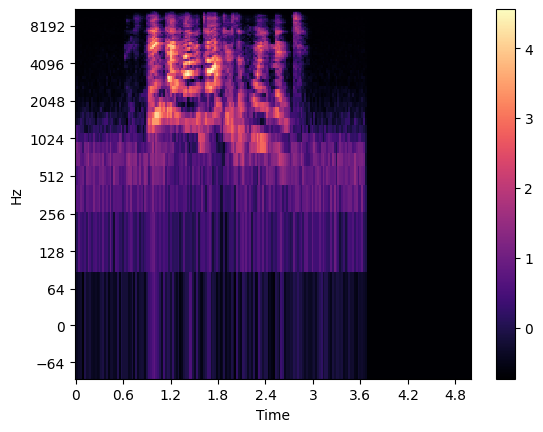

In [ ]:
import IPython.display as ipd

for files, mel, wave, lbl in train_dataset:
    print("Emotion:", le.inverse_transform([lbl])[0])
    librosa.display.specshow(mel.numpy().T, cmap='magma', x_axis='time', y_axis='log')
    ipd.display(ipd.Audio(wave, rate=TARGET_SR))
    break

plt.colorbar()

Emotion: Sad


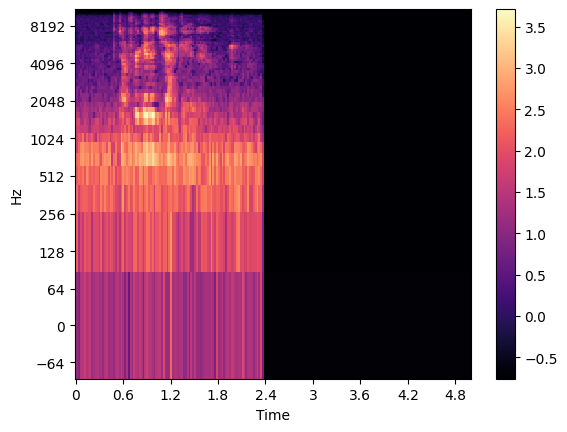

In [ ]:
for file, mel, wave, lbl in val_dataset:
    print("Emotion:", le.inverse_transform([lbl])[0])
    librosa.display.specshow(mel.numpy().T, cmap='magma', x_axis='time', y_axis='log')
    ipd.display(ipd.Audio(wave, rate=TARGET_SR))
    break

plt.colorbar()

Emotion: Disgust


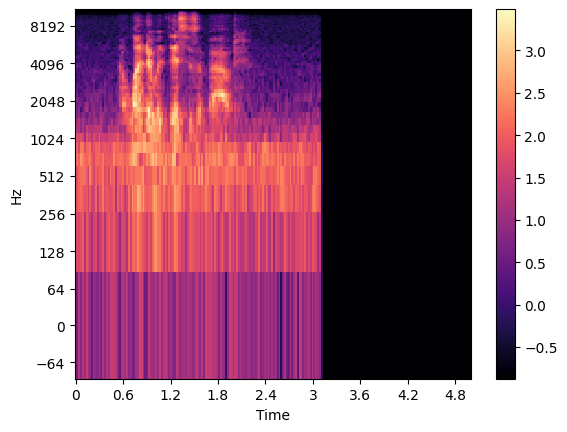

In [ ]:
for file, mel, wave, lbl in test_dataset:
    print("Emotion:", le.inverse_transform([lbl])[0])
    librosa.display.specshow(mel.numpy().T, cmap='magma', x_axis='time', y_axis='log')
    ipd.display(ipd.Audio(wave, rate=TARGET_SR))
    break

plt.colorbar()

🎵 Emotion: Disgust


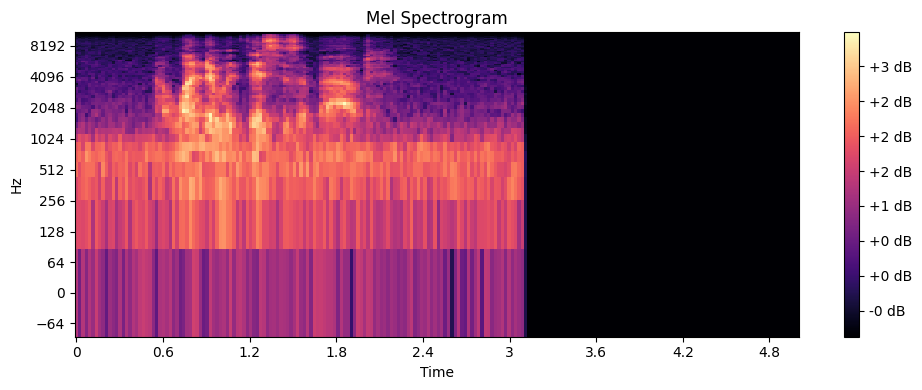

In [ ]:
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd

for file, mel, wave, lbl in test_dataset:
    print("🎵 Emotion:", le.inverse_transform([lbl])[0])

    plt.figure(figsize=(10, 4))
    spec = librosa.display.specshow(mel.numpy().T, cmap='magma', x_axis='time', y_axis='log')
    plt.title("Mel Spectrogram")
    plt.colorbar(spec, format='%+2.0f dB')  # ✅ Proper placement
    plt.tight_layout()
    plt.show()

    # ✅ Play the audio
    ipd.display(ipd.Audio(wave, rate=TARGET_SR))

    break  # just one sample for demo
